## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

Task 1: Instructions
Load the required libraries and the Nobel Prize dataset.
Use pd.read_csv to read in datasets/nobel.csv and save it into nobel.
Show at least the first six entries of nobel using the head() method



In [40]:
# Loading in required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

# Reading in the Nobel Prize data
df=pd.read_csv("nobel.csv")

# Taking a look at the first several winners
df.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

Task 2: Instructions
Count up the Nobel Prizes & count up the Number of laureates won Nobel Prize
plot the number of prizes for each sex .
Count the number of prizes for each birth_country and show the top 10 
plot the proportion between categories of nobel prizes handed






In [41]:
# the number of (possibly shared) Nobel Prizes handed
df.shape[0]

911

In [42]:
# to know how many prize is shared between more than one laureates
df.prize_share.value_counts()

1/1    344
1/2    306
1/3    201
1/4     60
Name: prize_share, dtype: int64

In [43]:
# show the number in more clean way by indicators charts
fig = go.Figure()
fig.add_trace(go.Indicator(mode="number",value=int(df.shape[0]),
             title={"text":"Number of laureates won Nobel Prizes  "},domain={"row":0,"column":0}))

fig.add_trace(go.Indicator(mode="number",value=int((344/1)+(306/2)+(201/3)+(60/4)),
             title=("Number of Nobel Prizes handed"),domain={"row":1,"column":0}))
fig.update_layout(grid={"rows":2,"columns":1,"pattern":"independent"})
fig.show()

In [44]:
df["sex"].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [45]:
# make chart shows the proportion of sex
pie_df = df.sex.value_counts().reset_index()
pie_df.columns = ['sex','count']
fig = px.pie(pie_df, values='count', names='sex', title='Proportion of genders',
             color_discrete_sequence=['#002080','#ff0066'])
fig.show()

In [46]:
# make a chart shows the top 10 countries
reg_df = df.sex.value_counts().reset_index()
reg_df.columns = ['sex','count']
fig = px.bar(reg_df,x='sex',y='count',title='Proportion of genders',text="count")
fig.show()

In [47]:
# make a chart shows the top 10 countries
reg_df = df.birth_country.value_counts()[:10].reset_index()
reg_df.columns = ['birth_country','count']
fig = px.bar(reg_df,x='birth_country',y='count',title='Number of prizes won by the top birth country',text="count")
fig.show()

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

Task 3: Instructions Create a DataFrame with two columns: decade and proportion of USA-born Nobel Prize winners that decade.

Add a usa_born_winner column to nobel, where the value is True when birth_country is "United States of America". Add a decade column to nobel for the decade each prize was awarded. Here, np.floor() will come in handy. Ensure the decade column is of type int64. Use groupby to group by decade, setting as_index=False. Then isolate the usa_born_winner column and take the mean(). Assign the resulting DataFrame to usa. Display usa. For the decade column, 1953 should become 1950, for example. Calculating this column is a bit tricky, but try to see if you can solve it using the np.floor function. If not, check the hint!

By setting as_index=False, you make sure that both the grouping variable and the calculated mean are included in the resulting DataFrame

In [49]:
# Calculating the proportion of USA born winners per decade
df['usa_born_winner'] = df['birth_country']=="United States of America"
df['decade'] = (np.floor(df['year']/10)*10).astype(int)
usa = df.groupby('decade',as_index=False)['usa_born_winner'].mean()
# Display the proportions of USA born winners per decade
display(df["usa_born_winner"])


0      False
1      False
2      False
3      False
4      False
       ...  
906    False
907    False
908    False
909    False
910    False
Name: usa_born_winner, Length: 911, dtype: bool

## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

Task 4: Instructions Plot the proportion of USA born winners per decade.

Use seaborn to plot usa with decade on the x-axis and usa_born_winner on the y-axis as an sns.lineplot. Assign the plot to ax. Fix the y-scale so that it shows percentages using PercentFormatter. See here for a Stack Overflow answer on how PercentFormatter works and here for the documentation of lineplot.

<ipython-input-53-eb3ab30d02a2>:10: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



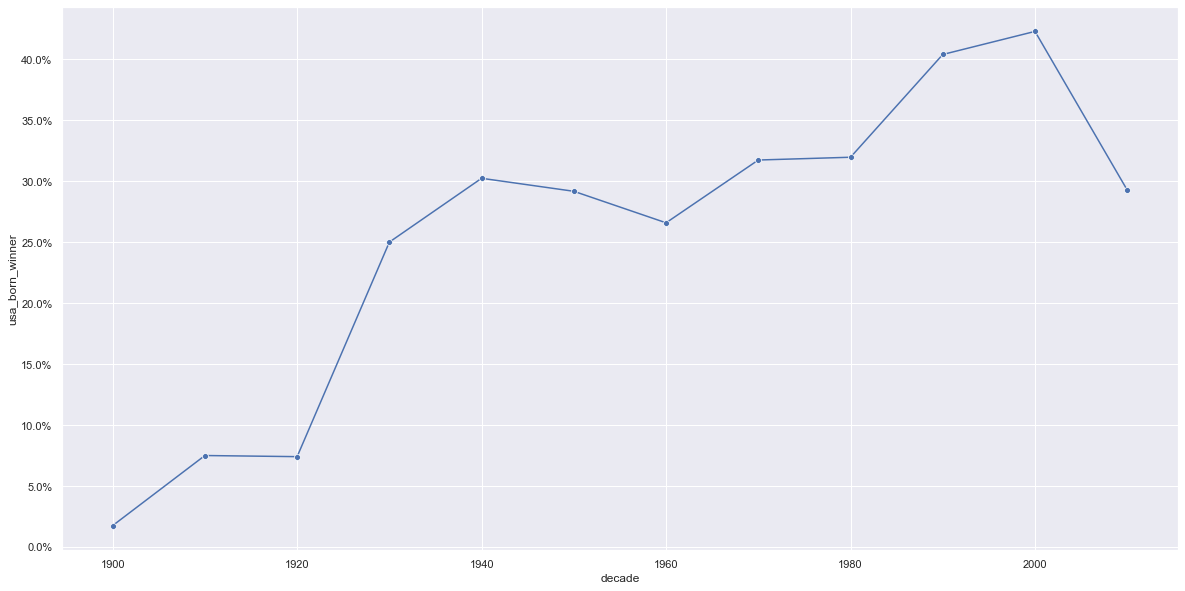

In [53]:
# Setting the plotting theme
sns.set_theme()
# and setting the size of all plots.
fig_dims = (20,10)
fig,ax = plt.subplots(figsize=fig_dims)
# Plotting USA 
sns.lineplot(data=usa, x='decade',y='usa_born_winner',marker="o") 
# Adding %-formatting to the y-axis
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
fig.show()


## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

Task 5: Instructions
Plot the proportion of female laureates by decade split by prize category.

Add the female column to nobel, where the value is True when sex is "Female".
Use groupby to group by both decade and category, setting as_index=False. Then isolate the female column and take the mean(). Assign the resulting DataFrame to fem_winner.
Copy and paste your seaborn plot from task 4 (including axis formatting code), but plot fem_winners and map the category variable to the hue parameter.
This task can be solved by copying and modifying the code from task 3 and 4 and make the all the previous with male


In [ ]:
# Calculating the proportion of female laureates per decade
df['female'] = df['sex']=="Female"
fem_winner = df.groupby(['decade'],as_index=False)['female'].mean()
# Plotting female  with % winners on the y-axis
sns.set_theme()
fig_dims = (20,10)
fig,ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=fem_winner, x='decade',y='female',marker="o",color='#ff0055') 
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
fig.show()

In [ ]:
f=(df.loc[df['sex'] == 'Female'])

In [ ]:
# make a chart shows the prizes of females
reg_df = f.category.value_counts().reset_index()
reg_df.columns = ['category','count']
fig = px.bar(reg_df,x='category',y='count',
             color_discrete_sequence=['#ff0055'],text="count")
fig.show()

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

Task 6: Instructions
Extract and display the row showing the first woman to win a Nobel Prize.

Select only the rows of 'Female' winners in nobel.
Using the nsmallest() method with its n and columns parameters, pick out the first woman to get a Nobel Prize.
Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

In [ ]:
# Picking out the first woman to win a Nobel Prize
fem=df[df['female']].nsmallest(1,'year')
display(fem[['category','full_name','prize','year']])

## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

Task 7: Instructions
Extract and display the rows of repeat Nobel Prize winners.

Use groupby to group nobel by 'full_name'.
Use the filter method to keep only those rows in nobel with winners with 2 or more prizes.
Note: a test in this task relies on the expected last output of this cell based on the order of the instructions and make a chart for them. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

In [ ]:
# Selecting the laureates that have received 2 or more prizes.
repeat=df.groupby(['full_name']).filter(lambda group : len(group)>=2)
display(repeat[['category','full_name','year']])

In [ ]:
# make a chart shows the repeated laurteates
reg_df = repeat.full_name.value_counts().reset_index()
reg_df.columns = ['full_name','count']
fig = px.bar(reg_df,y='full_name',x='count',title='The laureates that have received 2 or more prizes',
             color_discrete_sequence=['#316394'],text="count",width=1000,height=700,)
fig.show()

## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

Task 8: Instructions
Calculate and plot the age of each winner when they won their Nobel Prize.

Convert the df['birth_date'] column to datetime using pd.to_datetime.
Add a new column df['age'] that contains the age of each winner when they got the prize. That is, year of prize win minus birth year.
plot the age of nobel prize winners
Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

To get the year from a datetime column you need to use access the dt.year value. Here is an example:

a_data_frame['a_datatime_column'].dt.year
Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This type of plot is useful for visualizing linear relationships.



In [ ]:
# Converting birth_date from String to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Calculating the age of Nobel Prize winners
df['age'] = df['year'] - df['birth_date'].dt.year

In [ ]:
fig = go.Figure(go.Box(y=df['age'],name="Age"))
fig.update_layout(title="Distribution Of Age ")
fig.show()

In [ ]:
df.info()

In [ ]:

# Calculating the aproximate age of Nobel Prize winners
def GetGrade(age):
    if   ( age<=14 ):
        return "Child"
    elif (age<=25):
        return "Youth"
    elif (age<=64):
        return "Adult"
    else:
        return "Senior"
    

df['age_group'] = df.apply(lambda x : GetGrade(x['age']), axis=1)

df.age_group.value_counts()

## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

Task 9: Instructions
Plot how old winners are within the different price categories.

As before,  make a plot for plotting ages  But this time, make one plot per prize category .
Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."




In [ ]:

plt.figure(figsize=(15,9))
ax = sns.countplot(hue='age_group',x='category',data=df,palette='Set1')
ax.legend(loc='upper right',frameon=False),


sns.despine(bottom=True,left=True)

## 10. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

Task 10: Instructions
Pick out the rows of the oldest and the youngest winner of a Nobel Prize.

Use nlargest() to pick out and display the row of the oldest winner.
Use nsmallest() to pick out and display the row of the youngest winner.
Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

As before, you will need to use display() to display more than the last output of the cell. Here is the documentation for nsmallest and n_largest.


In [ ]:
display(df.nlargest(1, 'age'))
df.nsmallest(1, 'age')


In [ ]:
df.to_csv("nobelnew.csv",index=False)